# Models of Stock Return

In [25]:
import pandas as pd 
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
ms = pd.DataFrame.from_csv("microsoft.csv")
ms.head()

/home/kuanru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


# Distribution of Log return

In [10]:
ms["LogReturn"] = np.log(ms["Close"]).shift(-1) - np.log(ms["Close"])
ms

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994
2015-01-08,46.750000,47.750000,46.720001,47.590000,43.900375,29645200,-0.008441
2015-01-09,47.610001,47.820000,46.900002,47.189999,43.531395,23942800,-0.012581
2015-01-12,47.419998,47.540001,46.360001,46.599998,42.987129,23651900,-0.005163
2015-01-13,46.970001,47.910000,46.060001,46.360001,42.765747,35270600,-0.008666


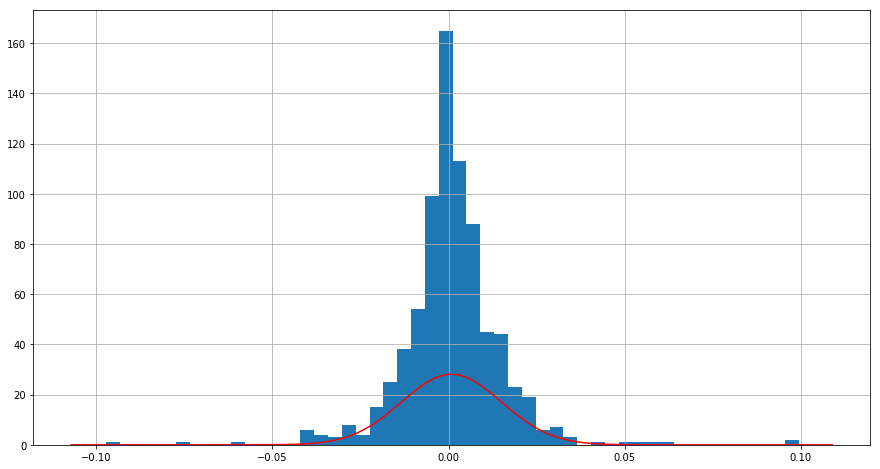

In [21]:
#Plot a histogram to show the distribution of Log return of Microsoft stock
from scipy.stats import norm  #use scipy to do statistic

#Calculate mean and variance for constructing the distribution
mu = ms["LogReturn"].mean()
sigma = ms["LogReturn"].std(ddof=1)

#Construct normal distribution
density = pd.DataFrame() # produce frame
density["x"] = np.arange(ms["LogReturn"].min() - 0.01, ms["LogReturn"].max() + 0.01, 0.001)
density["pdf"] = norm.pdf(density["x"], mu, sigma)

#Show the plot
ms["LogReturn"].hist(bins = 50, figsize=(15, 8))
plt.plot(density["x"], density["pdf"], color = "red")
plt.show()

# Calculate the probability of the stock price will drop over a certain percentage in a day

In [23]:
# probability that the stock price of microsoft will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print("The Probability is" , prob_return1)

The Probability is 0.00017118482608677652


# Calculate the probability of the stock price will drop over a certain percentage in a year

In [29]:
# Drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5)*sigma
print("The probability of dropping over 40% in 220 days is" , norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is 0.0029123633133305276


# Calculate Value at risk(VaR)

In [30]:
#Value at risk 
VaR = norm.ppf(0.05, mu, sigma)
print("Single day value at risk", VaR)

Single day value at risk -0.022523362407064984


In [31]:
#Quatile
#5% quantile
print("5% quantile" , norm.ppf(0.05, mu, sigma))
#95% quantile
print("95% quantile" , norm.ppf(0.95, mu, sigma))

5% quantile -0.022523362407064984
95% quantile 0.024163825379311017
